In [211]:
import pandas as pd
import numpy as np

Данные заранее скачал в отдельные csv файлы. Без них модель работать не будет

In [212]:
brent = pd.read_csv('Brent_price.csv', sep=';')

In [213]:
brent.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Dec 07, 2023",74.30,75.48,73.61,74.03,74.03,"24,213"
1,"Dec 06, 2023",77.06,77.63,74.11,74.30,74.30,"30,931"
2,"Dec 05, 2023",78.20,79.07,76.98,77.20,77.20,"30,931"
3,"Dec 04, 2023",79.43,79.66,77.52,78.03,78.03,"32,582"
4,"Dec 01, 2023",80.47,81.52,78.75,78.88,78.88,"29,551"


In [214]:
from statsmodels.tsa.stattools import adfuller

Зададим функцию с расширенным тестом Дики-Фуллера, которую будем использовать для решения 1 и 2 задачи

In [215]:
def ADF_test(x, alfa = 0.1):
    result = adfuller(x)
    
    print('Значение тест ADF (Расширенный тест Дики-Фуллера) для цены брента: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Критические значения:')
    
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    
    return result [1]< alfa


In [216]:
def log_r(x,y):
    return np.log(x) - np.log(y)

# Задача 1

In [217]:
p = 0.9
print('Стационарный вероятностью >' if ADF_test(brent['Close*'], 1-p) else 'Нельзя сказать, что стационарный с вероятностью >', p)

Значение тест ADF (Расширенный тест Дики-Фуллера) для цены брента: -2.395073
p-value: 0.143132
Критические значения:
	1%: -3.457
	5%: -2.873
	10%: -2.573
Нельзя сказать, что стационарный с вероятностью > 0.9


Значение теста больше 10%-критического значение (p-value больше 10%). Нельзя сказать, что временной ряд стационарен с вероятностью высокой веротностью (90% и выше)

# Задача 2

In [218]:
brent['log_r'] = log_r(brent['Close*'], brent['Close*'].shift(-1))
brent.dropna(axis = 0, how = 'any', inplace= True)


In [219]:
brent.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume,log_r
0,"Dec 07, 2023",74.30,75.48,73.61,74.03,74.03,"24,213",-0.003641
1,"Dec 06, 2023",77.06,77.63,74.11,74.30,74.30,"30,931",-0.038289
2,"Dec 05, 2023",78.20,79.07,76.98,77.20,77.20,"30,931",-0.010694
3,"Dec 04, 2023",79.43,79.66,77.52,78.03,78.03,"32,582",-0.010834
4,"Dec 01, 2023",80.47,81.52,78.75,78.88,78.88,"29,551",-0.048863


In [220]:
p = 0.99
print('Стационарный вероятностью >' if ADF_test(brent['log_r'], 1-p) else 'Нельзя сказать, что стационарный с вероятностью >', p)

Значение тест ADF (Расширенный тест Дики-Фуллера) для цены брента: -10.473430
p-value: 0.000000
Критические значения:
	1%: -3.457
	5%: -2.873
	10%: -2.573
Стационарный вероятностью > 0.99


adfuller посчитал нам совсем низкий p-value и это хорошо, но подозрительно. Тем не менее, сравнивая значения статистики с критическими значениями, приходим к тому же выводу

# Задачи 3 и 4

In [221]:
usd_rub = pd.read_csv('RUBUSD.csv', sep=',')

In [222]:
usd_rub.head(), brent.head()

(         Date       Open       High        Low      Close  Adj Close  Volume
 0  2022-12-07  60.514999  63.279999  60.514999  60.514999  60.514999       0
 1  2022-12-08  61.965000  62.980099  61.965000  63.464901  63.464901       0
 2  2022-12-09  62.035000  62.779999  62.035000  63.365002  63.365002       0
 3  2022-12-12  62.480000  63.249500  62.380001  62.480000  62.480000       0
 4  2022-12-13  62.625000  63.508499  62.625000  62.625000  62.625000       0,
            Date   Open   High    Low  Close*  Adj Close**  Volume     log_r
 0  Dec 07, 2023  74.30  75.48  73.61   74.03        74.03  24,213 -0.003641
 1  Dec 06, 2023  77.06  77.63  74.11   74.30        74.30  30,931 -0.038289
 2  Dec 05, 2023  78.20  79.07  76.98   77.20        77.20  30,931 -0.010694
 3  Dec 04, 2023  79.43  79.66  77.52   78.03        78.03  32,582 -0.010834
 4  Dec 01, 2023  80.47  81.52  78.75   78.88        78.88  29,551 -0.048863)

Нужно привести даты к одному формату, объединить по ним таблицы и посчитать log изменений цены доллара (для задачи 4)

In [223]:
from datetime import datetime
import datetime as dt

In [224]:
brent['Date'] = brent['Date'].apply(lambda x: datetime.strptime(x, "%b %d, %Y"))
brent.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume,log_r
0,2023-12-07,74.30,75.48,73.61,74.03,74.03,"24,213",-0.003641
1,2023-12-06,77.06,77.63,74.11,74.30,74.30,"30,931",-0.038289
2,2023-12-05,78.20,79.07,76.98,77.20,77.20,"30,931",-0.010694
3,2023-12-04,79.43,79.66,77.52,78.03,78.03,"32,582",-0.010834
4,2023-12-01,80.47,81.52,78.75,78.88,78.88,"29,551",-0.048863


In [225]:
usd_rub['Date'] = usd_rub['Date'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))
usd_rub.sort_values(by = 'Date', ascending=False, inplace=True)
usd_rub.head()

,Date,Open,High,Low,Close,Adj Close,Volume
261,2023-12-07,92.580002,93.529999,91.400002,92.375999,92.375999,0
260,2023-12-06,90.177498,93.279999,90.177498,90.177498,90.177498,0
259,2023-12-05,91.464996,92.512497,90.177498,91.464996,91.464996,0
258,2023-12-04,91.190002,91.589996,90.375000,91.190002,91.190002,0
257,2023-12-01,89.940002,90.714996,88.644997,89.940002,89.940002,0


In [226]:
usd_rub['log_r'] = log_r(usd_rub['Close'], usd_rub['Close'].shift(-1))
usd_rub.dropna(axis = 0, how = 'any', inplace= True)

In [227]:
df = pd.merge(usd_rub, brent, on = 'Date', suffixes=('_usd', '_brent'))[['Date', 'Close', 'Close*', 'log_r_usd', 'log_r_brent']]
df.head()

,Date,Close,Close*,log_r_usd,log_r_brent
0,2023-12-07,92.375999,74.03,0.024087,-0.003641
1,2023-12-06,90.177498,74.30,-0.014176,-0.038289
2,2023-12-05,91.464996,77.20,0.003011,-0.010694
3,2023-12-04,91.190002,78.03,0.013802,-0.010834
4,2023-12-01,89.940002,78.88,0.014278,-0.048863


Переименуем столбцы, чтобы не путаться

In [228]:
df.rename(columns={'Close':'Price_usd', 'Close*':'Price_brent'}, inplace= True)
df.head(15)

,Date,Price_usd,Price_brent,log_r_usd,log_r_brent
0,2023-12-07,92.375999,74.03,0.024087,-0.003641
1,2023-12-06,90.177498,74.30,-0.014176,-0.038289
2,2023-12-05,91.464996,77.20,0.003011,-0.010694
3,2023-12-04,91.190002,78.03,0.013802,-0.010834
4,2023-12-01,89.940002,78.88,0.014278,-0.048863
5,2023-11-30,88.665001,82.83,-0.002028,-0.003254
6,2023-11-29,88.845001,83.10,-0.002192,0.017236
7,2023-11-28,89.040001,81.68,-0.002300,0.021033
8,2023-11-27,89.245003,79.98,0.011325,-0.007474
9,2023-11-24,88.239998,80.58,-0.001416,-0.009756


Найдем log-изменения для доллара и уберем цену открытия

Регрессия в sklearn отлично подходит для задач машинного обучения, но мы будем использовать statmodels, так как там есть хорошая функция summary с нужными нам метриками. 
### Метрики и их интепретация - сначала для модели абсолютных значений, потом - лог-изменения: 

In [229]:
import statsmodels.api as sm
X = df[['Price_brent']]
y= df['Price_usd']
X = sm.add_constant(X)

model_absolute = sm.OLS(y, X)
results = model_absolute.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_usd   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.139
Method:                 Least Squares   F-statistic:                     36.65
Date:                Sat, 09 Dec 2023   Prob (F-statistic):           6.05e-09
Time:                        13:49:21   Log-Likelihood:                -838.59
No. Observations:                 222   AIC:                             1681.
Df Residuals:                     220   BIC:                             1688.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          17.0701     10.935      1.561      

$R^2$ очень низкий. Хорошее значение теста Фишера: вероятность того, что цена доллара лучше описыватает константон - почти нуделева. Отрицательное правдоподобие - тоже плохо. t-статистика для цены на нефть высокая, настолько что P>|t| почти ноль, что должно говорить значимости коэффициента перед ценой нефти. Очень высокие показатели AIC BIC, что должно говорить о переученности.
По савокупности, я бы не пользовался этой моедлью

In [230]:
X = df[['log_r_brent']]
y= df['log_r_usd']
X = sm.add_constant(X)

model_log_r = sm.OLS(y, X)
results = model_log_r.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              log_r_usd   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.139
Date:                Sat, 09 Dec 2023   Prob (F-statistic):              0.287
Time:                        13:49:21   Log-Likelihood:                 62.802
No. Observations:                 222   AIC:                            -121.6
Df Residuals:                     220   BIC:                            -114.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0100      0.012     -0.815      

Метрики этой логарифмической модели даже хуже. $R^2$ почти ноль. Статистика Фишера низкая и вероятность, что коэффичент перед log-изменением цены брента 0 с вероятностью 0,34, что много. P>|t| принимают большие значения (обычно сравнивают с 0,05), и оба коэффициента могут быть отброшены. Как и сама модель

### Вывод:
2022-2023 годы оказались периодами, когда традиционная связь между ценой нефти и курсом доллара (и между их изменениями) была нарушена. Российская нефть продается с переменным дисконтом к брент, наблидается задержка между изменениями цены на нефть и поступлениями валюту в страну, свущественные корректировки вносили крупные сделки выкупа иностранных активов в РФ, попытки государства управлять курсом, политические события, динамика импорта, а также оторванность нашей финансовой системы от мировой (РФ банки в санкциях, иностранные - ушли из России или не имеют значимых лимитов на РФ рынок). Эти и другие причины повлияли на динамику курса рубля, по всей видимости, существенно больше, чем цена нефти марки Брент

Подвергнем вывод сомнению и задумаемся, нет ли ошибки работы с данными

In [231]:
import matplotlib.pyplot as plt

In [232]:
df.describe()

,Price_usd,Price_brent,log_r_usd,log_r_brent
count,222.000000,222.000000,222.000000,222.000000
mean,83.123635,82.313784,-0.010099,-0.000126
std,11.447481,5.390585,0.183234,0.019905
min,5.000000,72.260000,-2.717538,-0.057844
25%,75.364998,78.092500,-0.004421,-0.012072
50%,81.764999,82.590000,0.002204,0.001948
75%,92.323749,85.760000,0.009323,0.013756
max,100.964996,96.550000,0.072493,0.055303


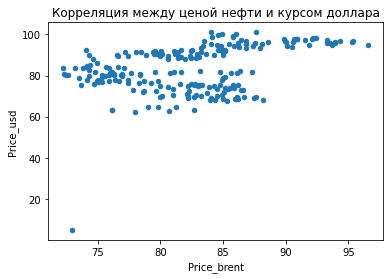

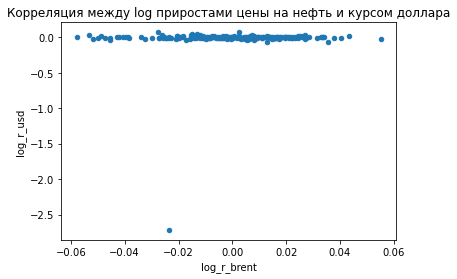

In [233]:
df.plot(kind='scatter', 
        x='Price_brent', 
        y='Price_usd', 
        title='Корреляция между ценой нефти и курсом доллара')

df.plot(kind='scatter', 
        x='log_r_brent', 
        y='log_r_usd', 
        title='Корреляция между log приростами цены на нефть и курсом доллара')


Может, все дело в выбросах? Уберем их

In [234]:
low = .05
high = .95
quant_df = df.quantile([low, high])
quant_df.head()

filt_df = df[['Price_usd', 'Price_brent', 'log_r_brent', 'log_r_usd']].apply(lambda x: x[(x>quant_df.loc[low,x.name]) & (x < quant_df.loc[high,x.name])], axis=0)
filt_df.dropna(axis = 0, inplace=True)

In [235]:
filt_df.describe()

,Price_usd,Price_brent,log_r_brent,log_r_usd
count,147.000000,147.000000,147.000000,147.000000
mean,83.561298,82.062993,0.000851,0.001909
std,8.651463,4.356650,0.015183,0.008283
min,68.464996,74.170000,-0.038879,-0.018025
25%,75.997501,78.520000,-0.009781,-0.003317
50%,81.665001,82.660000,0.002263,0.001331
75%,91.344997,85.160000,0.013633,0.008181
max,97.714996,92.060000,0.026439,0.023647


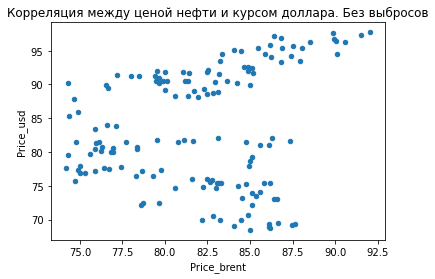

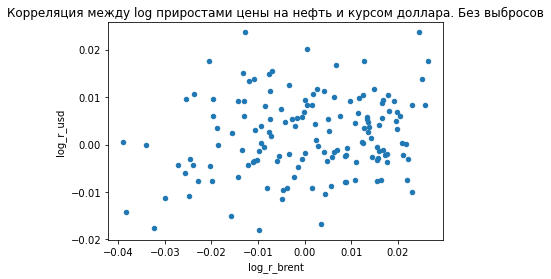

In [236]:
filt_df.plot(kind='scatter', 
        x='Price_brent', 
        y='Price_usd', 
        title='Корреляция между ценой нефти и курсом доллара. Без выбросов')

filt_df.plot(kind='scatter', 
        x='log_r_brent', 
        y='log_r_usd', 
        title='Корреляция между log приростами цены на нефть и курсом доллара. Без выбросов')

Построим модель на данных без выбросов и посмотрим на её метрики

In [237]:
X = filt_df[['log_r_brent']]
y= filt_df['log_r_usd']
X = sm.add_constant(X)

model_log_r = sm.OLS(y, X)
results = model_log_r.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              log_r_usd   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     5.319
Date:                Sat, 09 Dec 2023   Prob (F-statistic):             0.0225
Time:                        13:49:22   Log-Likelihood:                 499.23
No. Observations:                 147   AIC:                            -994.5
Df Residuals:                     145   BIC:                            -988.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0018      0.001      2.702      

Метрики модели улучшились: немного $R^2$, немного t статистика для переменной log_r_brent. Но в целом, конечно, модель очень плоха и в терминах $R^2$, и по критерию Стьюдента для объяниющей переменной

# Задача 5

Статистика Дабрина-Уотсона дает значания очень близкие к 2 для log-модели как с выбросами, так и без - посередине интервала [0, 4]. Можно сделать вывод об отсутствии автокорреляции 